<h1 style="text-align: center;"> Striver Strings - Medium Problems </h1>

# 1. Sort Characters by Frequency :

## Problem Statement :

You are given a string s. Return the array of unique characters, sorted by highest to lowest occurring characters.



If two or more characters have same frequency then arrange them in alphabetic order.

### Examples :

**Example 1:**
```
Input: s = "tree"
Output: ['e', 'r', 't' ]

Explanation:

The occurrences of each character are as shown below :

e --> 2
r --> 1
t --> 1.

The r and t have same occurrences , so we arrange them by alphabetic order.
```

**Example 2:**
```
Input: s = "raaaajj"
Output : ['a' , 'j', 'r' ]

Explanation:

The occurrences of each character are as shown below :

a --> 4

j --> 2

r --> 1
```

```
Constraints:
1 <= s.length <= 105
s consists of only lowercase English characters.

```

### Intuition

The task at hand involves sorting characters based on their frequency in a string. Intuitively, the solution can be broken down into two parts: counting the occurrences of each character and sorting the characters based on these counts. It is essential to focus on two sorting criteria — first, prioritize higher frequencies, and second, in cases of equal frequency, sort the characters alphabetically. Therefore, the thought process revolves around using an efficient frequency counting technique and a custom sorting mechanism to produce the required result.

### Approach

* Create a frequency array where each element is a pair of an integer (frequency) and its associated character. Initialize this array for all lowercase alphabetic characters.
* 
Traverse the string, incrementing the frequency of the respective character in the frequency array
* 
Sort the frequency array using a custom comparator that orders elements first by descending frequency and then by alphabetical order for characters with equal frequenc
* .
Generate the output by iterating over the sorted array and collecting characters that have a non-zero frequency.

## Dry Run

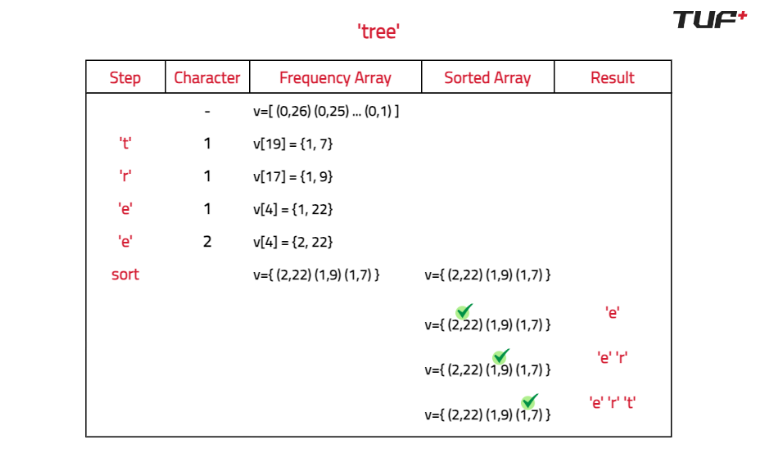

## Python Code

In [1]:
class Solution:
    def frequencySort(self, s):
        # Frequency array for characters 'a' to 'z'
        freq = [(0, chr(i + ord('a'))) for i in range(26)]

        # Count frequency of each character
        for ch in s:
            index = ord(ch) - ord('a')
            freq[index] = (freq[index][0] + 1, ch)

        # Sort by frequency (descending) and alphabetically (ascending)
        freq.sort(key=lambda x: (-x[0], x[1]))

        # Collect characters with non-zero frequency
        result = [ch for f, ch in freq if f > 0]
        return result

In [2]:
# Main method to test the function
if __name__ == "__main__":
    sol = Solution()
    s = "tree"
    result = sol.frequencySort(s)
    print(result)

['e', 'r', 't']


## Complexity Analysis

**Time Complexity:**
```
The time complexity of this solution is O(n + k log k) where n is the length of the string and k is the constant 26 for the alphabet.
```

**Space Complexity:**
```
The space complexity is O(k), where k is the constant 26 for the frequency array.
```

# 2. Maximum Nesting Depth of the Paranthesis :

## Problem Statement :

A string s is a valid parentheses string (VPS) if it meets the following conditions:

* It only contains digits 0-9, arithmetic operators +, -, *, /, and parentheses (, ).
* The parentheses are balanced and correctly nested.

Your task is to compute the maximum nesting depth of parentheses in s. The nesting depth is the highest number of parentheses that are open at the same time at any point in the string.

### Examples :

**Example 1:**
```
Input: s = "(1+(2*3)+((8)/4))+1"
Output: 3
Explanation: The deepest nested sub-expression is ((8)/4), which has 3 layers of parentheses.
```

**Example 2:**
```
Input: s = "(1)+((2))+(((3)))"
Output: 3
Explanation: The digit '3' is enclosed in 3 pairs of parentheses.
```

```
Constraints:

1 <= s.length <= 100
s consists of digits 0-9, arithmetic operators (+, -, *, /), and parentheses ( and ).
It is guaranteed that s is a valid parentheses string (VPS).
```

## Brute Force Solution

### Intuition

The nesting depth increases whenever we open a new parenthesis '(' and decreases when we close one ')'. Using a stack allows us to explicitly track how many parentheses are currently open at any point. The maximum size the stack reaches during traversal represents the deepest nesting level.

### Approach

* Initialize an empty stack.
* Iterate through each character in the string
* If the character is '(', push it onto the stack.
* If it is ')', pop one element from the stack.
* Keep track of the maximum size of the stack at any moment — this will be the nesting depth.
* Return that maximum depth.

## Dry Run

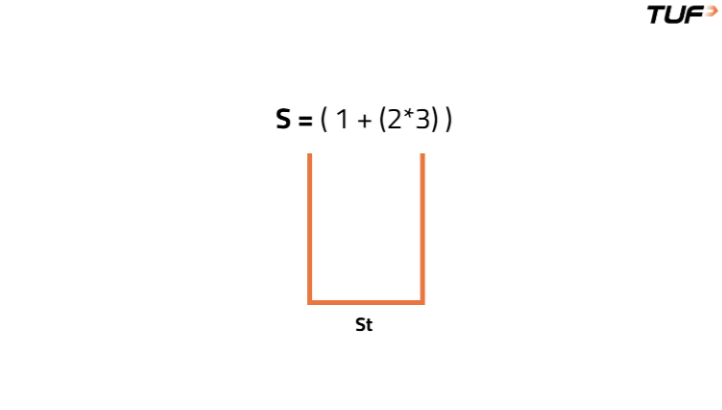

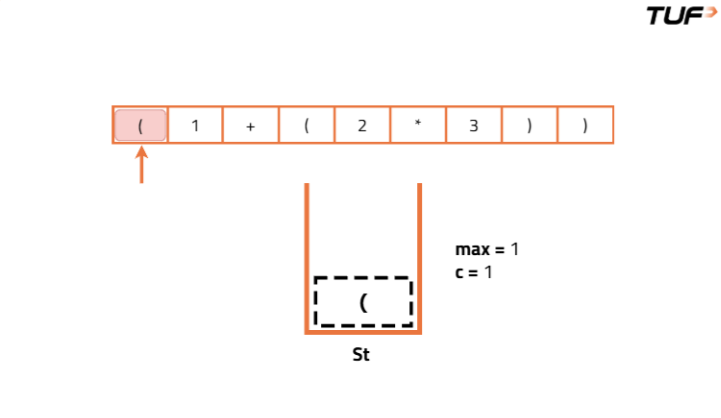

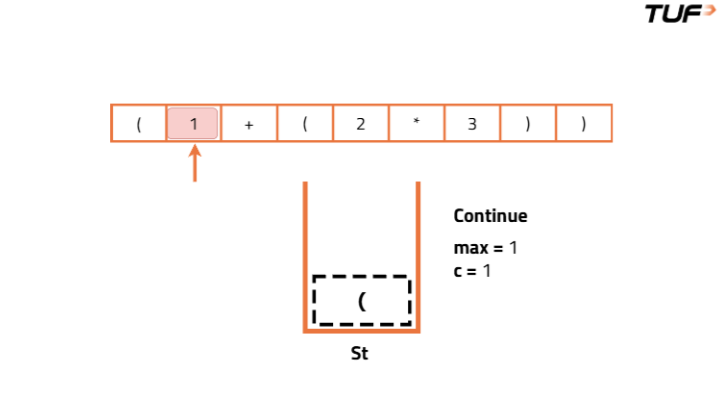

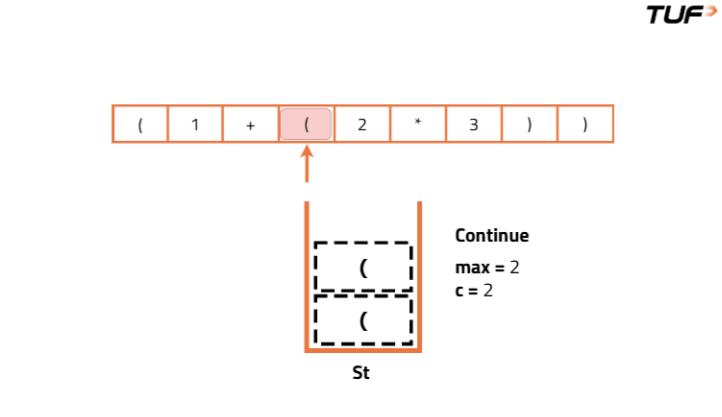

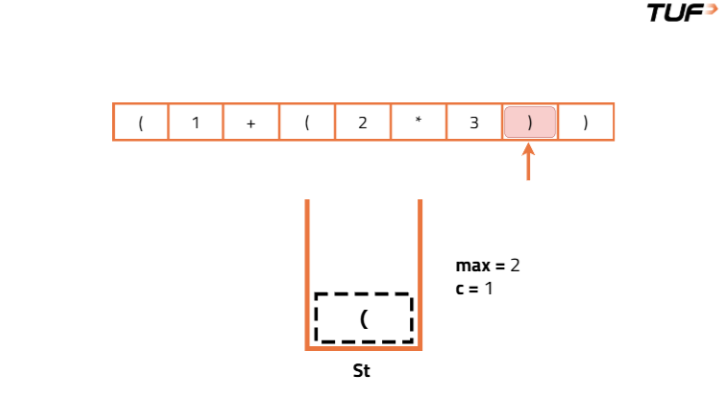

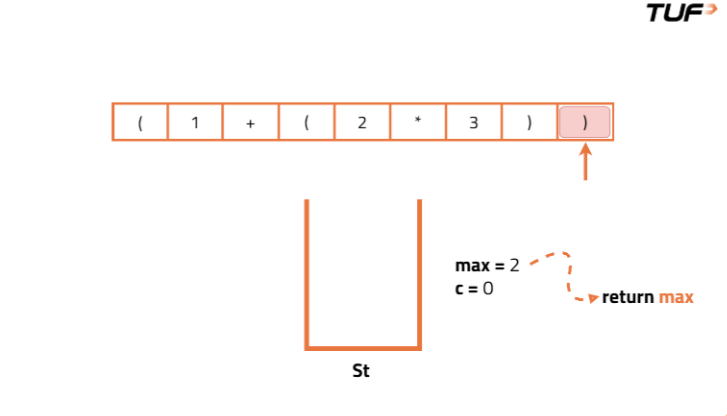

## Brute Force Python Solution

In [3]:
class Solution:
    def maxDepth(self, s: str) -> int:
        # Stack to track '('
        stack = []
        # Variable to track max depth
        max_depth = 0

        # Iterate through characters
        for c in s:
            if c == '(':
                stack.append(c)
                max_depth = max(max_depth, len(stack))
            elif c == ')':
                if stack:
                    stack.pop()

        # Return max depth
        return max_depth

In [4]:
if __name__ == "__main__":
    sol = Solution()
    s = "(1+(2*3)+((8)/4))+1"
    print(sol.maxDepth(s))  # Output: 3

3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n), since we scan the string once and each character is pushed/popped at most once.
```

**Space Complexity:**
```
The Space Complexity will be O(n), due to the stack storing open parentheses.
```

## Optimal Solution

### Intuition

We don’t actually need a full stack — only the count of currently open parentheses. Each '(' increases the depth by 1 and each ')' decreases it by 1. The maximum value that this counter ever reaches is the nesting depth.

### Approach

* Initialize two integers: depth = 0 and maxDepth = 0.
* Traverse each character in the string.
* When encountering '(', increment depth and update maxDepth.
* When encountering ')', decrement depth.
* Return maxDepth after traversal ends.

## Dry Run

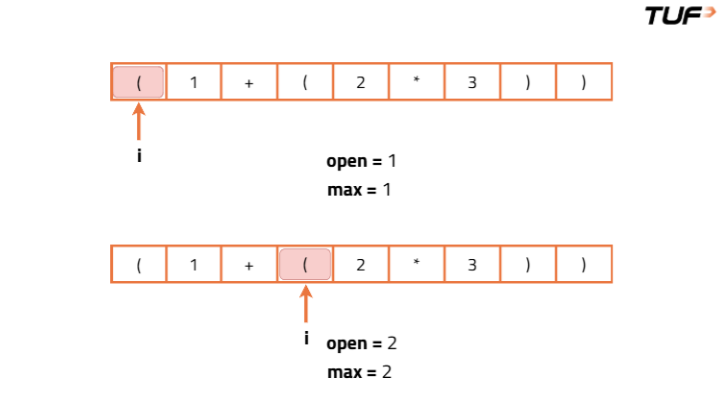

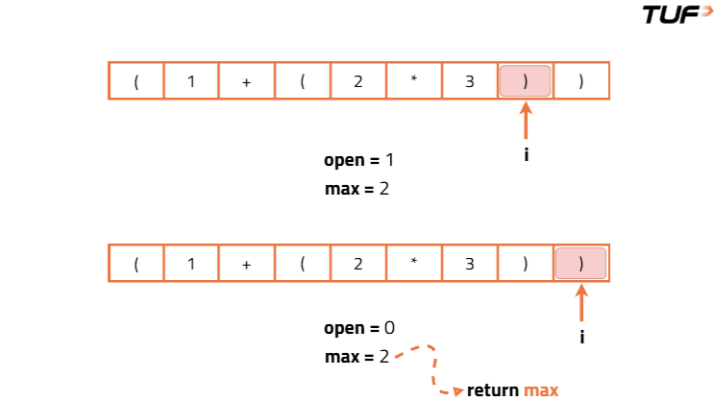

## Optimal Python Solution

In [6]:
class Solution:
    def maxDepth(self, s: str) -> int:
        depth = 0
        max_depth = 0
        # Traverse the string
        for c in s:
            # Track current and maximum depth
            if c == '(':
                depth += 1
                max_depth = max(max_depth, depth)
            elif c == ')':
                depth -= 1
        return max_depth

In [7]:
if __name__ == "__main__":
    sol = Solution()
    s = "(1+(2*3)+((8)/4))+1"
    print(sol.maxDepth(s))  # Output: 3

3


## Complexity Analysis

**Time Complexity:**
```
The time complexity of this solution is O(n) since we iterate through the string once.
```

**Space Complexity:**
```
The space complexity is O(1) since we only use integer variables (no stack).
```

# 3. Roman Number to Integer and Vice Versa :

## Problem Statement :

Roman numerals are represented by seven different symbols:

* I = 1
* V = 5
* X = 10
* L = 50
* C = 100
* D = 500
* M = 1000

Roman numerals are typically written from largest to smallest, left to right. However, in specific cases, a smaller numeral placed before a larger one indicates subtraction.

The following subtractive combinations are valid:

* I before V (5) and X (10) → 4 and 9
* X before L (50) and C (100) → 40 and 90
* C before D (500) and M (1000) → 400 and 900

Given a Roman numeral, convert it to an integer.

### Examples :

**Example 1:**
```
Input: s = "III"
Output: 3
Explanation: III = 1 + 1 + 1 = 3
```

**Example 2:**
```
Input: s = "XLII"
Output: 42
Explanation:  XL = 40, II = 2 → 40 + 2 = 42
```

```
Constraints:
1 <= s.length <= 15
s contains only the characters ('I', 'V', 'X', 'L', 'C', 'D', 'M')
It is guaranteed that s is a valid Roman numeral in the range [1, 3999]
```

### Intuition

The idea behind converting Roman numerals to integers is to process the numeral from left to right while deciding whether to add or subtract each symbol’s value. Normally, Roman numerals are written in descending order, so you simply add their values. However, when a smaller value appears before a larger one, it indicates subtraction instead of addition. For example, IV = 5 − 1 = 4. So the strategy is to look at each symbol and compare it with the one after it: if its value is smaller, subtract it; otherwise, add it. By following this simple rule throughout the string, the final total gives the correct integer value.

### Approach

* Create a mapping from Roman symbols to their integer values (I→1, V→5, X→10, L→50, C→100, D→500, M→1000).
* Initialize a running total to 0.
* Iterate through the Roman string from left to right.
* For each symbol, look up its value and also peek the value of the next symbol (if any).
* If the current value is less than the next value, subtract the current value from the total.
* Otherwise, add the current value to the total.
* After processing all symbols, the running total is the integer representation.ation.

## Dry Run

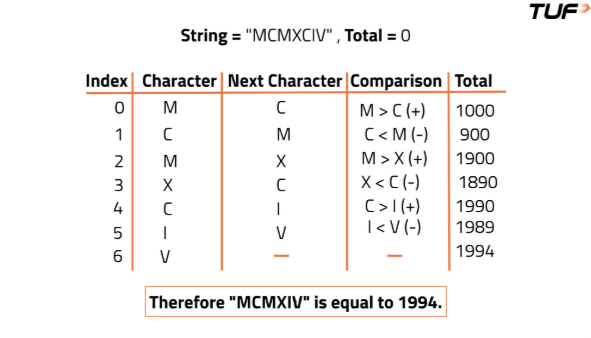

## Optimal Python Solution

In [8]:
class Solution:
    # Function to convert roman numeral into an integer
    def romanToInt(self, s: str) -> int:
        # Mapping Roman symbols to their integer values
        mp = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}

        # Result variable
        total = 0

        # Traverse the string
        for i in range(len(s)):
            # If next value is larger, subtract current value
            if i + 1 < len(s) and mp[s[i]] < mp[s[i + 1]]:
                total -= mp[s[i]]
            # Otherwise add current value
            else:
                total += mp[s[i]]
        return total

In [9]:
sol = Solution()
print(sol.romanToInt("MCMXCIV"))

1994


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n), where n is the length of the Roman numeral string. Each character is processed once, with constant-time lookups in the mapping.
```

**Space Complexity:**
```
The Space Complexity will be O(1), since the mapping of Roman symbols is constant in size and no additional data structures grow with input length.
```

# Integer to Roman Number :

### Approach

* It uses a greedy approach: repeatedly subtract the largest possible Roman value and append its symbol.
* It handles subtractive pairs (e.g., CM = 900, XL = 40, IV = 4) by including them directly in the mapping.
* The approach is efficient and easy to read.

## Optimal Python Solution

In [10]:
class Solution:
    # Function to convert integer to Roman numeral
    def intToRoman(self, num: int) -> str:
        # Mapping of integer values to Roman symbols, ordered for greedy subtraction
        value_symbols = [
            (1000, 'M'), (900, 'CM'), (500, 'D'), (400, 'CD'),
            (100, 'C'),  (90, 'XC'),  (50, 'L'),  (40, 'XL'),
            (10, 'X'),   (9, 'IX'),   (5, 'V'),   (4, 'IV'),
            (1, 'I')
        ]

        roman = []
        for value, symbol in value_symbols:
            # Append as many symbols as fit into num
            count = num // value
            if count:
                roman.append(symbol * count)
                num -= value * count

            # Early exit if num reduced to 0
            if num == 0:
                break

        return ''.join(roman)

In [11]:
# Example usage:
sol = Solution()
print(sol.intToRoman(1994))  # Output: "MCMXCIV"
print(sol.intToRoman(58))    # Output: "LVIII"
print(sol.intToRoman(9))     # Output: "IX"

MCMXCIV
LVIII
IX


# 4. Implement AtoI (String to Integer) :

## Problem Statement :

Implement the function myAtoi(s) which converts the given string s to a 32-bit signed integer (similar to the C/C++ atoi function).

### Steps to Implement:

* First, ignore any leading whitespace characters ' ' until the first non-whitespace character is found.
* Check the next character to determine the sign. If it’s a '-', the number should be negative. If it’s a '+', the number should be positive. If neither is found, assume the number is positive.
* Read the digits and convert them into a number. Stop reading once a non-digit character is encountered or the end of the string is reached. Leading zeros should be ignored during conversion.
* The result should be clamped within the 32-bit signed integer range: [-2147483648, 2147483647]. Return -2147483648 if the number is less than -2147483648, and return 2147483647 if the number is greater than 2147483647.
* Finally, return the computed number after applying all the above steps.


### Examples :

**Example 1:**
```
Input: s = " -12345"
Output: -12345

Explanation:

Ignore leading whitespaces.
The sign '-' is encountered, indicating the number is negative.
Digits 12345 are read and converted to -12345.
```

**Example 2:**
```
Input: s = "4193 with words"
Output: 4193

Explanation:

Read the digits 4193 and stop when encountering the first non-digit character (w).
```

```
Constraints:
0 ≤ s.length ≤ 200
s consists of English letters (both lowercase and uppercase), Digits '0' to '9', Characters: ' ', '+', '-', and '.'
```

## Brute Force Solution

### Intuition

The brute force approach involves iterating over the string, processing characters one by one, and building the integer. We handle the sign and stop parsing when a non-digit character is encountered. At the end, the result is clamped to fit within the 32-bit signed integer range to avoid overflow.

### Approach

* Ignore leading whitespaces by advancing the index until a non-space character is found.
* Check for an optional sign ('+' or '-'), and record it.
* Process digit characters one by one and build the number.
* Stop parsing when a non-digit character is encountered.
* Clamp the result within the range [-2^31, 2^31 - 1] to stay within 32-bit signed integer limits.

## Brute Force Python Solution

In [12]:
class Solution:
    # Method to convert string to integer
    def myAtoi(self, input: str) -> int:
        i, n = 0, len(input)
        
        # Step 1: Skip leading spaces
        while i < n and input[i] == ' ':
            i += 1
        
        # Step 2: Handle the sign
        sign = 1
        if i < n and input[i] == '-':
            sign = -1
            i += 1
        elif i < n and input[i] == '+':
            i += 1
        
        # Step 3: Parse digits and build the number
        result = 0
        while i < n and input[i].isdigit():
            result = result * 10 + (ord(input[i]) - ord('0'))
            i += 1
            
            # Step 4: Handle overflow and underflow
            if result * sign >= 2**31 - 1:
                return 2**31 - 1
            if result * sign <= -2**31:
                return -2**31
        
        # Step 5: Return the final result with the sign
        return result * sign

In [15]:
# Driver code
if __name__ == "__main__":
    sol = Solution()
    
    # Example input
    input = " 42"
    
    # Output the result of converting the string to an integer
    result = sol.myAtoi(input)
    print(result)  # Expected output: 42

42


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n), where n is the length of the string. We scan the string once.
```

**Space Complexity:**
```
The Space Complexity will be O(1), as we use a constant amount of extra space.
```

## Optimal Solution

### Intuition

The optimized approach follows the same logic as the brute-force method but adds overflow checks during digit parsing. Instead of building the entire number and clamping afterward, it proactively ensures that the result does not exceed the 32-bit signed integer boundaries while parsing. This prevents incorrect calculations and eliminates the need for post-processing.

### Approach

* Ignore Whitespace: Skip all leading whitespace characters.
* Determine Sign: Check for an optional '+' or '-' sign to determine the number's polarity.
* Parse Digits with Overflow Check: For each digit, multiply the current result by 10 and add the new digit. Before updating the result, check whether adding the new digit would cause an overflow:

```
If result > INT_MAX / 10 or
result == INT_MAX / 10 and digit > 7 (for positive values) or digit > 8 (for negative values), return INT_MAX or INT_MIN accordingly.

Return Result: Return the signed result after processing all valid digits.
```

## Dry Run

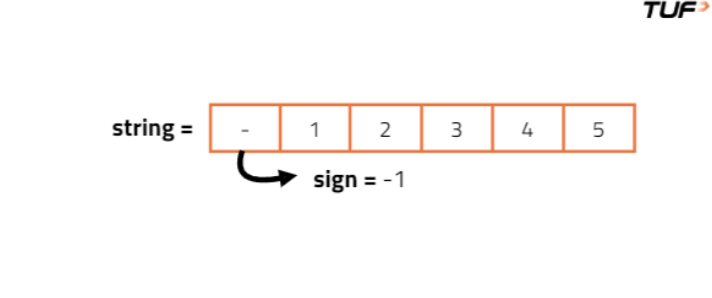
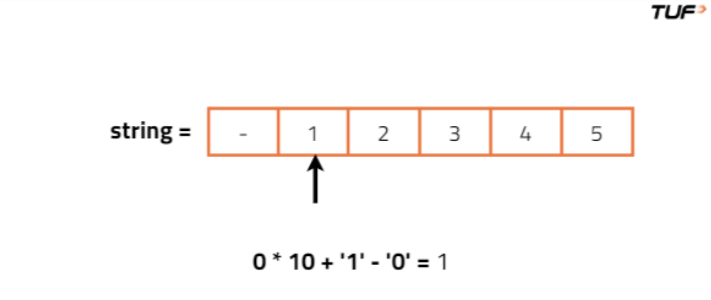
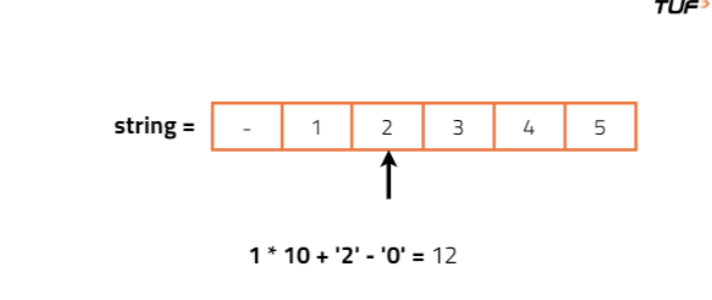
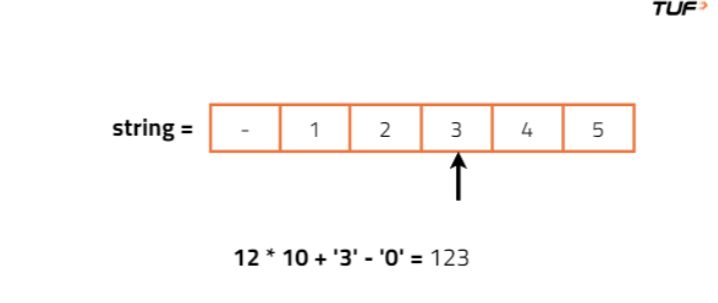
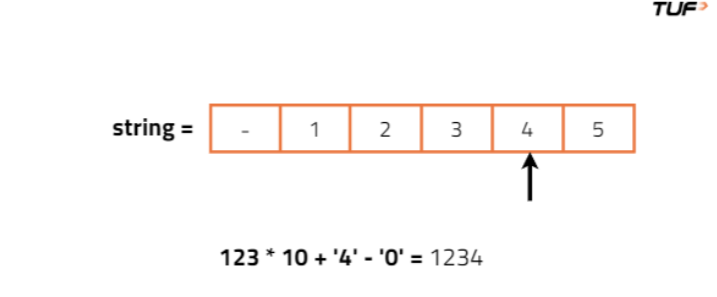
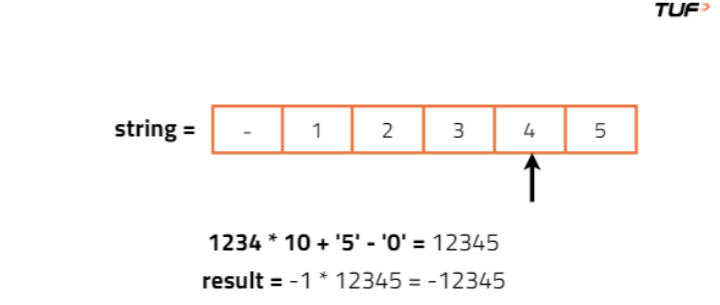

## Optimal Python Solution

In [18]:
class Solution:
    def myAtoi(self, s: str) -> int:
        INT_MAX = 2**31 - 1
        INT_MIN = -2**31

        i, n = 0, len(s)

        # Step 1: Skip leading spaces
        while i < n and s[i] == ' ':
            i += 1

        # If string is empty after trimming
        if i == n:
            return 0

        # Step 2: Determine sign
        sign = 1
        if s[i] == '-':
            sign = -1
            i += 1
        elif s[i] == '+':
            i += 1

        # Step 3: Parse digits with overflow check
        result = 0
        while i < n and s[i].isdigit():
            digit = ord(s[i]) - ord('0')

            # Overflow check BEFORE adding digit
            if result > INT_MAX // 10 or (result == INT_MAX // 10 and digit > (7 if sign == 1 else 8)):
                return INT_MAX if sign == 1 else INT_MIN

            result = result * 10 + digit
            i += 1

        return result * sign

In [19]:
# Driver code
if __name__ == "__main__":
    sol = Solution()
    
    # Example input
    input = "42"
    
    # Output the result of converting the string to an integer
    result = sol.myAtoi(input)
    print(result)  # Expected output: 42

42


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n), where n is the length of the string. Each character is processed once.
```

**Space Complexity:**
```
The Space Complexity will be O(1), since only a fixed number of variables are used.
```

# 5. Count Number of Substrings :

## Problem Statement :

You are given a string s and a positive integer k.
Return the number of substrings that contain exactly k distinct characters.

### Examples :

**Example 1:**
```
Input: s = "pqpqs", k = 2  
Output: 7  

Explanation:

All substrings with exactly 2 distinct characters:  
"pq", "pqp", "pqpq", "qp", "qpq", "pqs", "qs"  

Total = 7.
```

**Example 2:**
```
Input: s = "abcbaa", k = 3  
Output: 5  
Explanation:

All substrings with exactly 3 distinct characters:  
"abc", "abcb", "abcba", "bcba", "cbaa"  

Total = 5.
```

### Approach

* Define a helper function atMostKDistinct(s, k):
* Use a sliding window with two pointers (left and right) and a frequency map.
* Expand the window by moving the right pointer and count characters.
* If the count of distinct characters exceeds k, shrink the window by moving the left pointer.
* For each valid window, add (right - left + 1) to the result.

**To find substrings with exactly k distinct characters, calculate:**

```
atMostKDistinct(s, k) - atMostKDistinct(s, k-1)
```


## Optimal Python Solution

In [20]:
def at_most_k_distinct(s, k):
    left, res = 0, 0
    freq = {}

    # Iterate with right pointer
    for right in range(len(s)):
        freq[s[right]] = freq.get(s[right], 0) + 1

        # Shrink window if distinct characters exceed k
        while len(freq) > k:
            freq[s[left]] -= 1
            if freq[s[left]] == 0:
                del freq[s[left]]
            left += 1

        # Count substrings in current window
        res += (right - left + 1)
    return res

# Function to count substrings with exactly k distinct characters
def count_substrings(s, k):
    return at_most_k_distinct(s, k) - at_most_k_distinct(s, k - 1)

In [21]:
def main():
    # Sample test
    s = "pqpqs"
    k = 2

    # Output the result
    print("Count:", count_substrings(s, k))  # Output: 7

if __name__ == "__main__":
    main()

Count: 7


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n) for each call to atMostKDistinct.
```

**Space Complexity:**
```
The Space Complexity will be O(1), for the map size bounded by 26 characters for alphabets.
```

# 6. Longest Palindromic Substring (Without Dynamic Programming) :

## Problem Statement :

Given a string s, return the longest palindromic substring in s.

### Examples :

**Example 1:**
```
Input: s = "babad"
Output: "bab"
Explanation: It is the longest palindromic substring. "aba" is also a valid answer.
```

**Example 2:**
```
Input: s = "cbbd"
Output: "bb"
Explanation: It is the longest palindromic substring.
```

### Approach

* The goal is to find the longest palindromic substring by treating each character (and each pair) as a potential center.
* Every palindrome is symmetric, so we expand outward from a center to check for symmetry.
* There are two types of centers to consider: one at a character (odd-length) and one between characters (even-length).
* For each center, expand left and right while the characters on both sides match.
* Keep track of the maximum length palindrome found by updating its start and end indices.
* The final result is the substring between the recorded boundaries of the longest expansion.

## Optimal Python Solution

In [22]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        start, end = 0, 0

        # Iterate through each character as center
        for center in range(len(s)):
            # Expand around odd length
            len1 = self.expandFromCenter(s, center, center)
            # Expand around even length
            len2 = self.expandFromCenter(s, center, center + 1)
            # Maximum length from both cases
            max_len = max(len1, len2)

            # Update the boundaries if longer palindrome found
            if max_len > end - start:
                start = center - (max_len - 1) // 2
                end = center + max_len // 2

        # Return the longest palindromic substring
        return s[start:end + 1]

    def expandFromCenter(self, s, left, right):
        # Expand while valid and characters match
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        # Return the length of the palindrome
        return right - left - 1

In [23]:
if __name__ == "__main__":
    sol = Solution()
    input_str = "babad"
    print("Longest Palindromic Substring:", sol.longestPalindrome(input_str))

Longest Palindromic Substring: aba


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N²) For each character, whereas expanding from the center could take a Time Complexity up to O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as there is no extra space used.
```

# 7. Sum of Beauty of All Substrings :

## Problem Statement :

The beauty of a string is defined as the difference between the frequency of the most frequent character and the least frequent character (excluding characters that do not appear) in that string.

Given a string s, return the sum of beauty values of all possible substrings of s.

### Examples :

**Example 1:**
```
Input: s = "xyx"
Output: 1

Explanation: The substrings with non-zero beauty are:

- "xyx" → frequencies: x:2, y:1 → beauty = 2 - 1 = 1

- "xy" → x:1, y:1 → beauty = 0

- "yx" → y:1, x:1 → beauty = 0

- "x" or "y" → beauty = 0

Total sum = 1 (from "xyx") = 1
```

**Example 2:**
```
Input: s = "aabcbaa"
Output: 17

Explanation: Various substrings such as "aabc", "bcba", etc., have non-zero beauty values. Summing all gives 17.
```

```
Constraints:
1 <= s.length <= 500
s consists of only lowercase English letters ('a' to 'z')
```

### Intuition

Every substring of a given string contributes some "beauty" value depending on the difference between its most and least frequent characters. To find the total beauty of all substrings, we need to consider every possible substring and evaluate its beauty. The key idea is simple: We can fix a starting index i and then expand to all possible ending indices j. For each substring s[i...j], we can calculate the frequency of each character. The beauty of that substring is the difference between the highest and lowest frequency among the characters that appear at least once. We keep adding this value to a running total. Since the alphabet size (26 letters) is small, we can safely recompute frequencies for each substring without worrying about performance for moderate-sized strings.

### Approach

* Initialize a variable totalBeauty to store the sum of beauties of all substrings.
* Iterate through each starting index i of the string.
* For each i, create a frequency array freq[26] initialized to 0 to track character counts.
* Expand the substring by iterating the ending index j from i to n-1.
* For each new character s[j], update its frequency in the array.
* Compute the maximum and minimum frequencies among non-zero values in freq.
* Beauty of the current substring = maxFreq - minFreq.
* Add this value to totalBeauty.
* After all substrings are processed, return totalBeauty.

## Dry Run

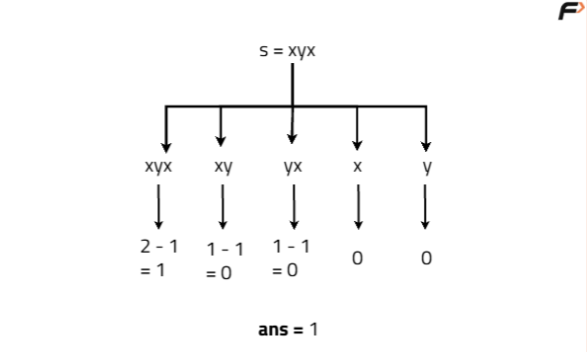

## Optimal Python Solution

In [24]:
class Solution:
    # Function to calculate total beauty of all substrings
    def beautySum(self, s: str) -> int:
        # Variable to store total beauty
        total_beauty = 0

        # Loop through all starting indices
        for i in range(len(s)):
            # Frequency dictionary for each substring
            freq = [0] * 26

            # Expand the substring from i to j
            for j in range(i, len(s)):
                # Increment frequency
                freq[ord(s[j]) - ord('a')] += 1

                # Find max and min frequencies excluding zeros
                non_zero = [f for f in freq if f > 0]
                max_f = max(non_zero)
                min_f = min(non_zero)

                # Add beauty of current substring
                total_beauty += max_f - min_f

        # Return total sum
        return total_beauty

In [25]:
if __name__ == "__main__":
    sol = Solution()

    # Example 1
    print(sol.beautySum("xyx"))  # 1

    # Example 2
    print(sol.beautySum("aabcbaa"))  # 17

1
17


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(26 × n²) ≈ O(n²). We consider all substrings (O(n²)) and compute frequencies for 26 letters each time.
```

**Space Complexity:**
```
The Space Complexity will be O(26) = O(1), since a fixed-size array is used for character frequencies.
```